**Table of contents**    
- The goal of this project    
- Importing libraries    
- Reading and exploring the data    
- Linear regression model    
  - Residuals (training set)    
  - Metrics (train set)    
  - Testing the model on the test set    
  - Metrics (test set)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=false
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## The goal of this project

#### This project aims to predict country **score** variable based on:
* GDP per capita
* Social support
* Healthy life expectancy	
* Freedom to make life choices
* Perceptions of corruption

## Importing libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statistics
from sklearn.model_selection import train_test_split
import math

## Reading and exploring the data

In [25]:
df = pd.read_csv('report_2018-2019.csv')

In [26]:
df.head(10)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
5,84,Algeria,2018,5.295,0.979,1.154,0.687,0.077,0.055,0.135
6,142,Angola,2018,3.795,0.730,1.125,0.269,0.000,0.079,0.061
7,47,Argentina,2019,6.086,1.092,1.432,0.881,0.471,0.066,0.050
8,29,Argentina,2018,6.388,1.073,1.468,0.744,0.570,0.062,0.054
9,116,Armenia,2019,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [27]:
for i in ['Country or region','Year']:
    print(f'Unique values count of {i}: {df[i].nunique()}')

Unique values count of Country or region: 160
Unique values count of Year: 2


In [28]:
df.shape

(312, 10)

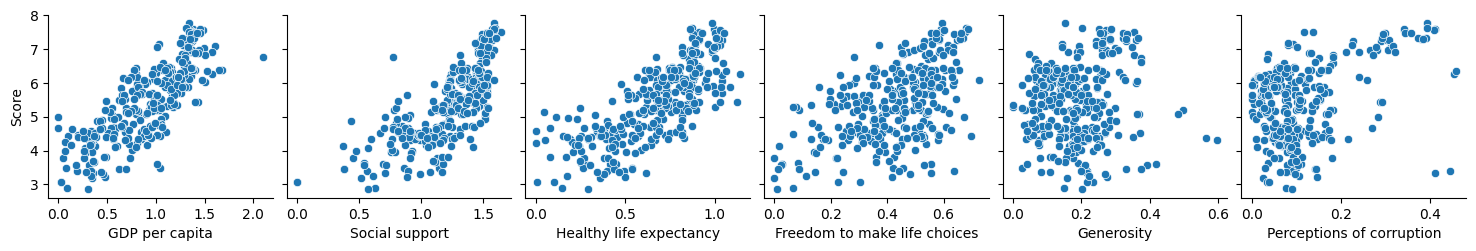

In [29]:
sns.pairplot(
    data = df,
    x_vars = df.columns[[4, 5, 6, 7, 8, 9]],
    y_vars = 'Score')

In [30]:
for i in df.columns.to_list():
    if i != 'Country or region' and i != 'Score' and i!="Overall rank":
        corr = statistics.correlation(df[i],df['Score'])
        print(f'corr between {i} and Score = {round(corr,2)}')

corr between Year and Score = 0.01
corr between GDP per capita and Score = 0.8
corr between Social support and Score = 0.76
corr between Healthy life expectancy and Score = 0.76
corr between Freedom to make life choices and Score = 0.54
corr between Generosity and Score = 0.11
corr between Perceptions of corruption and Score = 0.4


In [31]:
df.loc[:,~df.columns.isin(['Country or region','Score','Overall rank','Year'])].corr().round(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
GDP per capita,1.00,0.71,0.82,0.34,-0.04,0.31
Social support,0.71,1.00,0.67,0.42,-0.01,0.20
Healthy life expectancy,0.82,0.67,1.00,0.30,0.00,0.29
Freedom to make life choices,0.34,0.42,0.30,1.00,0.27,0.44
Generosity,-0.04,-0.01,0.00,0.27,1.00,0.34
Perceptions of corruption,0.31,0.20,0.29,0.44,0.34,1.00


In [32]:
df.loc[:,['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']].corr().round(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
GDP per capita,1.00,0.71,0.82,0.34,0.31
Social support,0.71,1.00,0.67,0.42,0.20
Healthy life expectancy,0.82,0.67,1.00,0.30,0.29
Freedom to make life choices,0.34,0.42,0.30,1.00,0.44
Perceptions of corruption,0.31,0.20,0.29,0.44,1.00


## Linear regression model

In [33]:
x = df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']]
y = df['Score']
x = sm.add_constant(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.6,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 6)
(125, 6)
(187,)
(125,)


In [34]:
mod = sm.OLS(y_train,x_train).fit()
mod_res = mod.summary()
print(mod_res)

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     135.9
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.52e-59
Time:                        16:12:15   Log-Likelihood:                -150.53
No. Observations:                 187   AIC:                             313.1
Df Residuals:                     181   BIC:                             332.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model equation

<h4><br>Score = 1.9439 * const + 1.0127 * GDP per capita + 0.9220 * Social support </br> <br>
+ 0.9891 * Healthy life expectancy + 1.5774 * Freedom to make life chocies + 0.8915 * Perceptions of corruption</h4></br>

In [35]:
mod.predict(x_train)

272    4.907637
154    4.332268
268    3.500661
221    5.574266
218    5.820285
         ...   
188    4.920856
71     6.262893
106    3.488510
270    6.191836
102    5.575336
Length: 187, dtype: float64

### Residuals (training set)

Text(0.5, 1.0, 'Residual Plot (Train Set)')

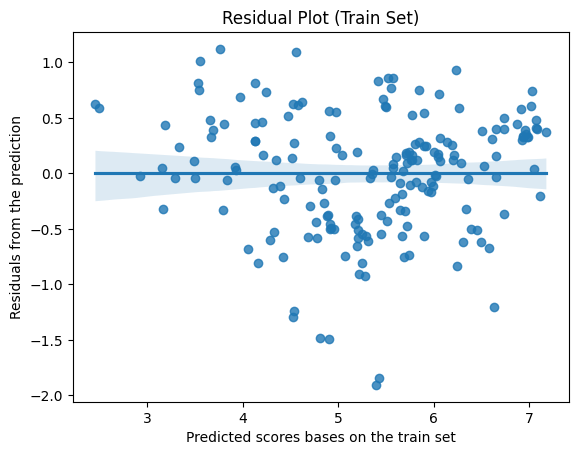

In [36]:
sns.regplot(x=mod.predict(x_train),y=mod.resid)
plt.xlabel('Predicted scores bases on the train set')
plt.ylabel('Residuals from the prediction')
plt.title('Residual Plot (Train Set)')

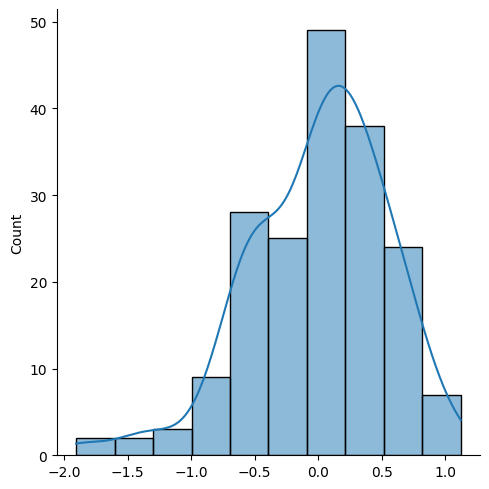

In [37]:
sns.displot(x = mod.resid,kde=True,bins=10)

In [38]:
sum(mod.resid)

-9.015010959956271e-14

### Metrics (train set)

In [39]:
print(f'R^2 = {round(r2_score(y_train,mod.predict(x_train)),2)}')
print(f'MAE = {round(mean_absolute_error(y_train,mod.predict(x_train)),2)}')
print(f'MAPE = {round(mean_absolute_percentage_error(y_train,mod.predict(x_train)),2)}')

R^2 = 0.79
MAE = 0.43
MAPE = 0.09


### Testing the model on the test set

In [40]:
y_test_pred = mod.predict(x_test)

In [41]:
y_test_pred

228    6.745613
9      5.086932
57     5.822137
60     3.712343
25     5.259790
         ...   
96     6.668138
140    4.670467
176    4.231055
86     4.361566
262    4.106786
Length: 125, dtype: float64

In [42]:
y_test

228    6.374
9      4.559
57     5.246
60     3.973
25     5.956
       ...  
96     6.985
140    4.509
176    4.356
86     4.350
262    4.139
Name: Score, Length: 125, dtype: float64

In [43]:
df_test = pd.DataFrame({'y_test':y_test,
                        'y_test_prediction':y_test_pred,
                        'error':y_test - y_test_pred,
                        'absolute_error':np.abs(y_test-y_test_pred)})

In [44]:
df_test

,y_test,y_test_prediction,error,absolute_error
228,6.374,6.745613,-0.371613,0.371613
9,4.559,5.086932,-0.527932,0.527932
57,5.246,5.822137,-0.576137,0.576137
60,3.973,3.712343,0.260657,0.260657
25,5.956,5.259790,0.696210,0.696210
...,...,...,...,...
96,6.985,6.668138,0.316862,0.316862
140,4.509,4.670467,-0.161467,0.161467
176,4.356,4.231055,0.124945,0.124945
86,4.350,4.361566,-0.011566,0.011566


Text(0.5, 1.0, 'Residual Plot')

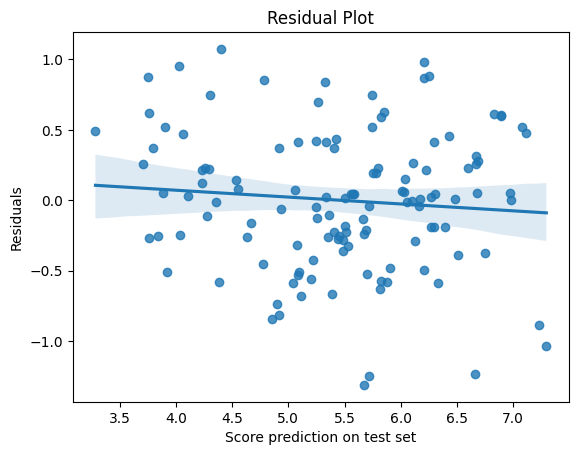

In [45]:
sns.regplot(data = df_test,
            x = 'y_test_prediction',
            y = 'error')
plt.ylabel('Residuals')
plt.xlabel('Score prediction on test set')
plt.title('Residual Plot')

### Metrics (test set)

In [46]:
print(f'''R^2 = {round(r2_score(df_test['y_test'],df_test['y_test_prediction']),2)}''')
print(f'''MAE = {round(mean_absolute_error(df_test['y_test'],df_test['y_test_prediction']),2)}''')
print(f'''MAPE = {round(mean_absolute_percentage_error(df_test['y_test'],df_test['y_test_prediction']),2)}''')

R^2 = 0.76
MAE = 0.39
MAPE = 0.07
